In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the hpcc.csv file

df = pd.read_csv('hpcc.csv')
df.head()

,RUN,VM1,VM2,VM3,C1,C2,C3,H1,H2,H3
0,MPI_Wtick,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09
1,HPL_Tflops,0.00514137,0.00512789,0.00511576,0.00552649,0.00559106,0.0055386,0.00548935,0.00551584,0.00554237
2,HPL_time,1093.2,1096.07,1098.67,1017.02,1005.27,1014.79,1023.9,1018.98,1014.1
3,HPL_eps,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16
4,HPL_RnormI,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09


In [3]:
# Multiply row 1 by 10^3
df.iloc[1, 1:] = pd.to_numeric(df.iloc[1, 1:]) * 10**3

# Rename the row
df.iloc[1, 0] = "HPL_Gflops"

df.head()

,RUN,VM1,VM2,VM3,C1,C2,C3,H1,H2,H3
0,MPI_Wtick,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09
1,HPL_Gflops,5.14137,5.12789,5.11576,5.52649,5.59106,5.5386,5.48935,5.51584,5.54237
2,HPL_time,1093.2,1096.07,1098.67,1017.02,1005.27,1014.79,1023.9,1018.98,1014.1
3,HPL_eps,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16
4,HPL_RnormI,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09


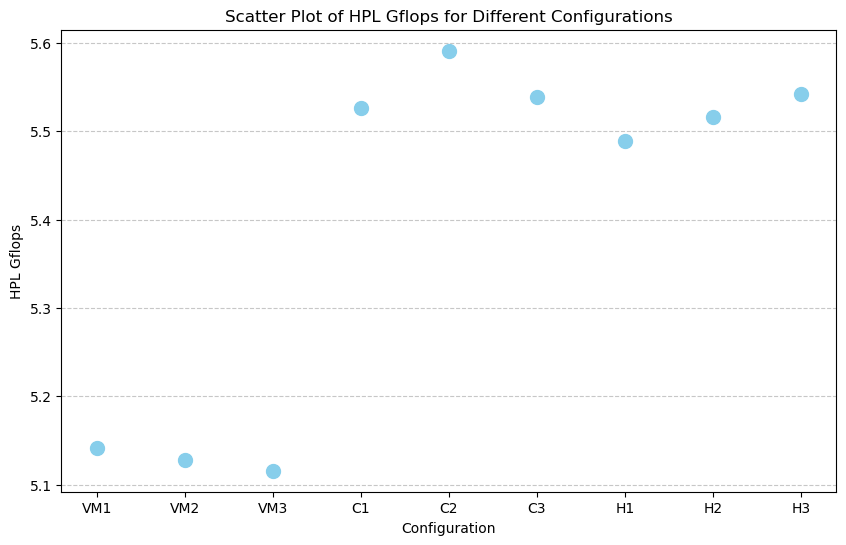

In [5]:
# Extract the HPL_Gflops row and set it as hpl_gflops
hpl_gflops = df.iloc[1, 1:].astype(float)  # Convert values to float for plotting

# Create a scatter plot for HPL_Gflops
plt.figure(figsize=(10, 6))
plt.scatter(hpl_gflops.index, hpl_gflops.values, color='skyblue', s=100)

# Add labels, title, and grid
plt.xlabel("Configuration")
plt.ylabel("HPL Gflops")
plt.title("Scatter Plot of HPL Gflops for Different Configurations")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipykernel_55019/2523337048.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_55019/2523337048.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


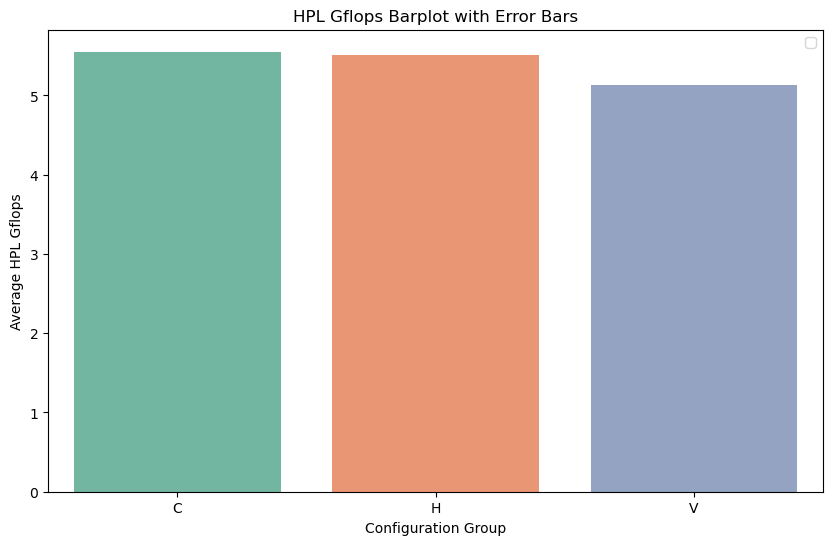

In [ ]:
# Group and average the configurations
grouped_hpl_gflops = hpl_gflops.groupby(hpl_gflops.index.str[0]).mean()

# Define a custom color palette
palette = sns.color_palette("Set2", len(grouped_hpl_gflops))

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=grouped_hpl_gflops.index,
    y=grouped_hpl_gflops.values,
    palette=palette[:len(grouped_hpl_gflops)]
)

# Add labels, title, and legend
plt.xlabel("Configuration Group")
plt.ylabel("Average HPL Gflops")
plt.title("HPL Gflops Barplot with Error Bars")
plt.legend()
plt.show()

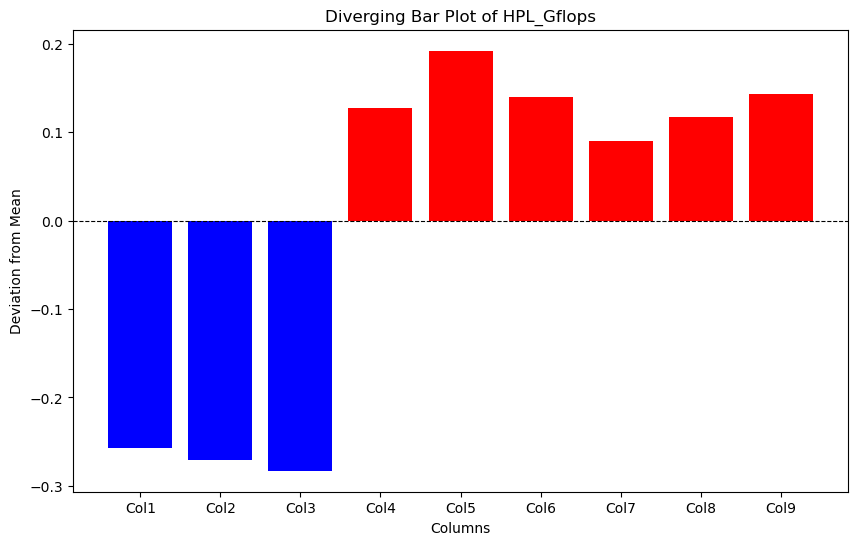

In [ ]:
# Calculate the mean
mean_value = np.mean(data)

# Calculate deviations from the mean
deviations = [x - mean_value for x in data]

# Create a diverging bar plot
plt.figure(figsize=(10, 6))
colors = ['red' if dev > 0 else 'blue' for dev in deviations]
plt.bar(categories, deviations, color=colors)

# Add a horizontal line for the mean
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Add labels, title, and legend
plt.xlabel("Columns")
plt.ylabel("Deviation from Mean")
plt.title("Diverging Bar Plot of HPL_Gflops")
plt.show()